In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("../../../Datasets/Social_Network_Ads.csv")

In [4]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [5]:
df.isna().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [6]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [7]:
y_ser = pd.Series(y)
y_ser.value_counts().values

array([257, 143], dtype=int64)

<Axes: xlabel='Purchased', ylabel='count'>

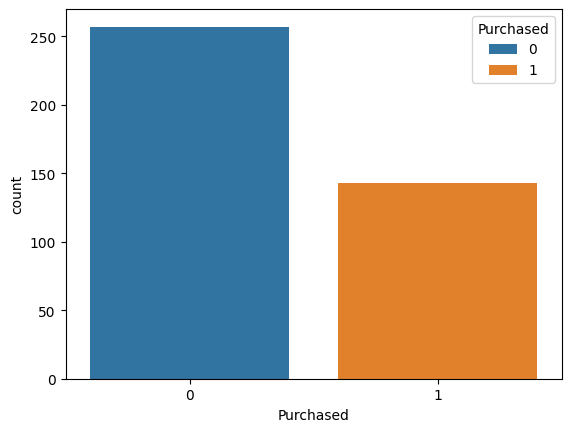

In [8]:
sns.countplot(df, x='Purchased',hue='Purchased')

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y,train_size=0.2, random_state=0)

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [11]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='entropy')
dtc.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [12]:
y_pred = dtc.predict(x_test)

In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_score(y_test, y_pred)

0.875

<Axes: >

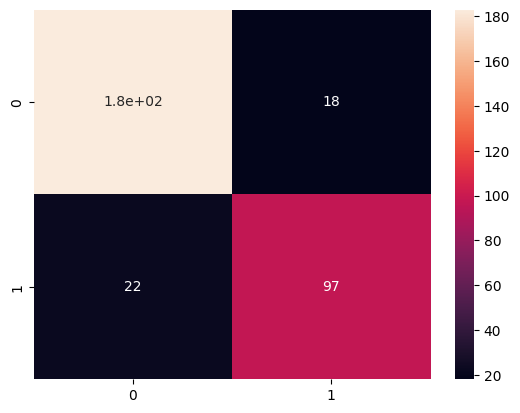

In [14]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)